<center>
    <h1><font color=darkred>Machine learning in action </font></h1>
    <h1><font color=darkred> Association rule learning </font></h1>
    <h3>Le Hai Phu</h3>
    <h4>Student name:    </h4>
    <hr>
    <h1>Exercise 11: Edinburgh bakery </h1>
    <h3> 2024</h3>
</center





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

# Read the dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML/ML review/Class 11 - Association rule/Datasets/BreadBasket_DMS.csv")

In [5]:
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


# Visualization
Use value_counts() to find top 15 best sellers

Text(0.5, 1.0, 'Best sellers')

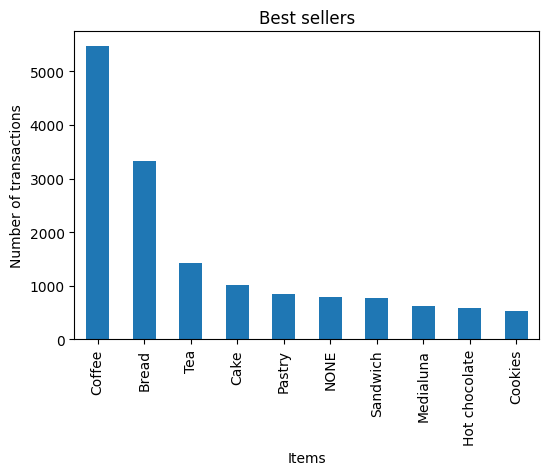

In [6]:
fig, ax=plt.subplots(figsize=(6,4))
df['Item'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

# Check unique products in all the transactions

In [7]:
df["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

# Drop all the rows if data['Item'] == 'NONE' and reset index

In [8]:
df[df['Item'] == 'NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [9]:
df = df[df['Item'] != 'NONE']
df.reset_index(drop=True)
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


# Check if some items may be reported twice
Hint: use groupby Item on 2 criteria: Transaction and Item, and then count.

Reset_index if necessary

In [10]:
df_transaction = df.groupby(['Transaction', 'Item'])["Item"].count().reset_index(name="count")
df_transaction.head(10)

,Transaction,Item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


# Find all transactions with repeated items  (count>1)

In [11]:
df_transaction[df_transaction['count'] > 1]

,Transaction,Item,count
1,2,Scandinavian,2
22,11,Bread,2
47,21,Coffee,2
97,49,Coffee,2
116,60,Coffee,2
...,...,...,...
18772,9618,Cake,2
18787,9627,Coffee,2
18804,9634,Coffee,2
18847,9664,Coffee,2


# Preprocess the dataset to make sure every item must be reported once in every single transaction

There are many approaches. The assigment is simple, with only 1 item per row, so you may use drop_duplicates().

In [12]:
df = df.drop_duplicates()
df_group = df.groupby(["Transaction"])["Item"].apply(', '.join).reset_index()
df_group.head(10)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,3,"Hot chocolate, Jam, Cookies"
3,4,Muffin
4,5,"Coffee, Pastry, Bread"
5,6,"Medialuna, Pastry, Muffin"
6,7,"Medialuna, Pastry, Coffee, Tea"
7,8,"Pastry, Bread"
8,9,"Bread, Muffin"
9,10,"Scandinavian, Medialuna"


# Merge products in the same transactions

Hint: Create a new dataframe  grouped by 'Transaction', performed on 'Item', and then join strings (remember to reset the index)

# Split the strings and put them in lists

In [13]:
for i in range(len(df_group)):
    df_group['Item'][i] = list(set(df_group['Item'][i].split(', ')))
df_group.head()


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_group['Item'][i] = list(set(df_group['Item'][i].split(', ')))
<ipython-input-13-8bc8bd3bbf73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['Item'][i] = list(set(df_group['Item'][i].split(', ')))
<ipython-input-13-8bc8bd3bbf73>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are sett

,Transaction,Item
0,1,[Bread]
1,2,[Scandinavian]
2,3,"[Jam, Hot chocolate, Cookies]"
3,4,[Muffin]
4,5,"[Pastry, Coffee, Bread]"


# Step 3: Create a list of all lists of items

In [14]:
a = []
for i in range(len(df_group)):
    a.append(df_group['Item'][i])


# Step 4: Convert the above list to a dataframe

In [15]:
df = pd.DataFrame(a)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Bread,None,None,None,None,None,None,None,None,None
1,Scandinavian,None,None,None,None,None,None,None,None,None
2,Jam,Hot chocolate,Cookies,None,None,None,None,None,None,None
3,Muffin,None,None,None,None,None,None,None,None,None
4,Pastry,Coffee,Bread,None,None,None,None,None,None,None


# Import TransactionEncoder

In [20]:
from mlxtend.preprocessing import TransactionEncoder

# Convert to np array

In [16]:
transaction = []
for i in range(df.shape[0]):
    transaction.append([str(df.values[i,j]) for j in range(df.shape[1])])
transaction = np.array(transaction)
transaction

array([['Bread', 'None', 'None', ..., 'None', 'None', 'None'],
       ['Scandinavian', 'None', 'None', ..., 'None', 'None', 'None'],
       ['Jam', 'Hot chocolate', 'Cookies', ..., 'None', 'None', 'None'],
       ...,
       ['Tacos/Fajita', 'Coffee', 'Tea', ..., 'None', 'None', 'None'],
       ['Pastry', 'Coffee', 'None', ..., 'None', 'None', 'None'],
       ['Smoothies', 'None', 'None', ..., 'None', 'None', 'None']],
      dtype='<U29')

# Apply TransactionEncoder()

In [21]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Drop column None

In [22]:
dataset = dataset.drop(['None'], axis=1)
dataset.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Encode 0 and 1

Hint: dataset = dataset.astype(int)


In [23]:
dataset = dataset.astype(int)
dataset.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# apriori

In [24]:
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.036344,(Alfajores),1
1,0.016059,(Baguette),1
2,0.327205,(Bread),1
3,0.040042,(Brownie),1
4,0.103856,(Cake),1
...,...,...,...
56,0.023666,"(Toast, Coffee)",2
57,0.014369,"(Tea, Sandwich)",2
58,0.010037,"(Cake, Coffee, Bread)",3
59,0.011199,"(Pastry, Coffee, Bread)",3


In [25]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
34,0.090016,"(Coffee, Bread)",2
42,0.054728,"(Cake, Coffee)",2


In [26]:
frequent_itemsets[ (frequent_itemsets['length'] == 3)].head()

,support,itemsets,length
58,0.010037,"(Cake, Coffee, Bread)",3
59,0.011199,"(Pastry, Coffee, Bread)",3
60,0.010037,"(Cake, Coffee, Tea)",3


In [23]:
pip uninstall mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: mlxtend 0.23.3
Uninstalling mlxtend-0.23.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/mlxtend-0.23.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/mlxtend/*
Proceed (Y/n)? y
  Successfully uninstalled mlxtend-0.23.3


In [27]:
pip install mlxtend==0.19.0

In [1]:
import mlxtend
print(mlxtend.__version__)

0.19.0


In [28]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
13,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,2,1
14,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,1,2
0,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,1,1
1,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,1,1
3,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,1,1
2,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,1,1
6,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,1,1
7,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,1,1
10,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,2,1
11,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,1,2


In [29]:
# Sort values based on confidence
rules.sort_values("confidence",ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
6,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,1,1
4,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,1,1
2,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,1,1
13,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,2,1
9,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,1,1
0,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,1,1
12,"(Cake, Coffee)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,2,1
3,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,1,1
11,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,1,2
10,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,2,1


# Visualization with NetworkX

I changed some parameters: min_support or min_threshold

In [30]:
frequent_items= apriori(dataset, use_colnames=True, min_support=0.03)
print(frequent_items.head())

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

    support     itemsets
0  0.036344  (Alfajores)
1  0.327205      (Bread)
2  0.040042    (Brownie)
3  0.103856       (Cake)
4  0.478394     (Coffee)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
2,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
3,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
4,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
5,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
6,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
7,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384


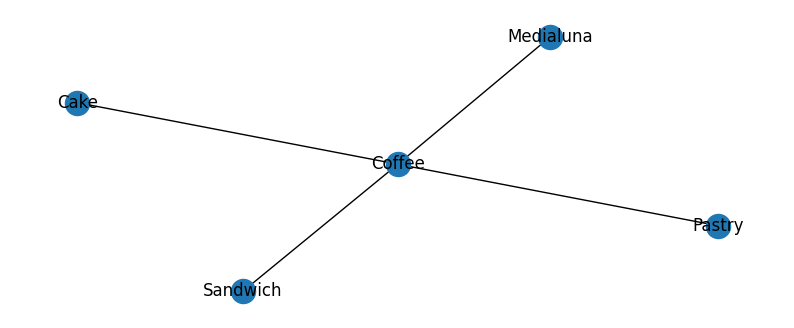

In [31]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()
